In [1]:
import pandas as pd
import numpy as np

# Data Loading

In [2]:
df = pd.read_csv('Super_Store_data.csv', encoding='ISO-8859-1')

In [12]:
copy_df = df

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [5]:
df.shape

(2121, 21)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [18]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   object        
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [19]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# Convert to time series format

In [20]:
df.set_index('Order Date', inplace=True)

In [21]:
df.head(2)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [22]:
copy_df=df

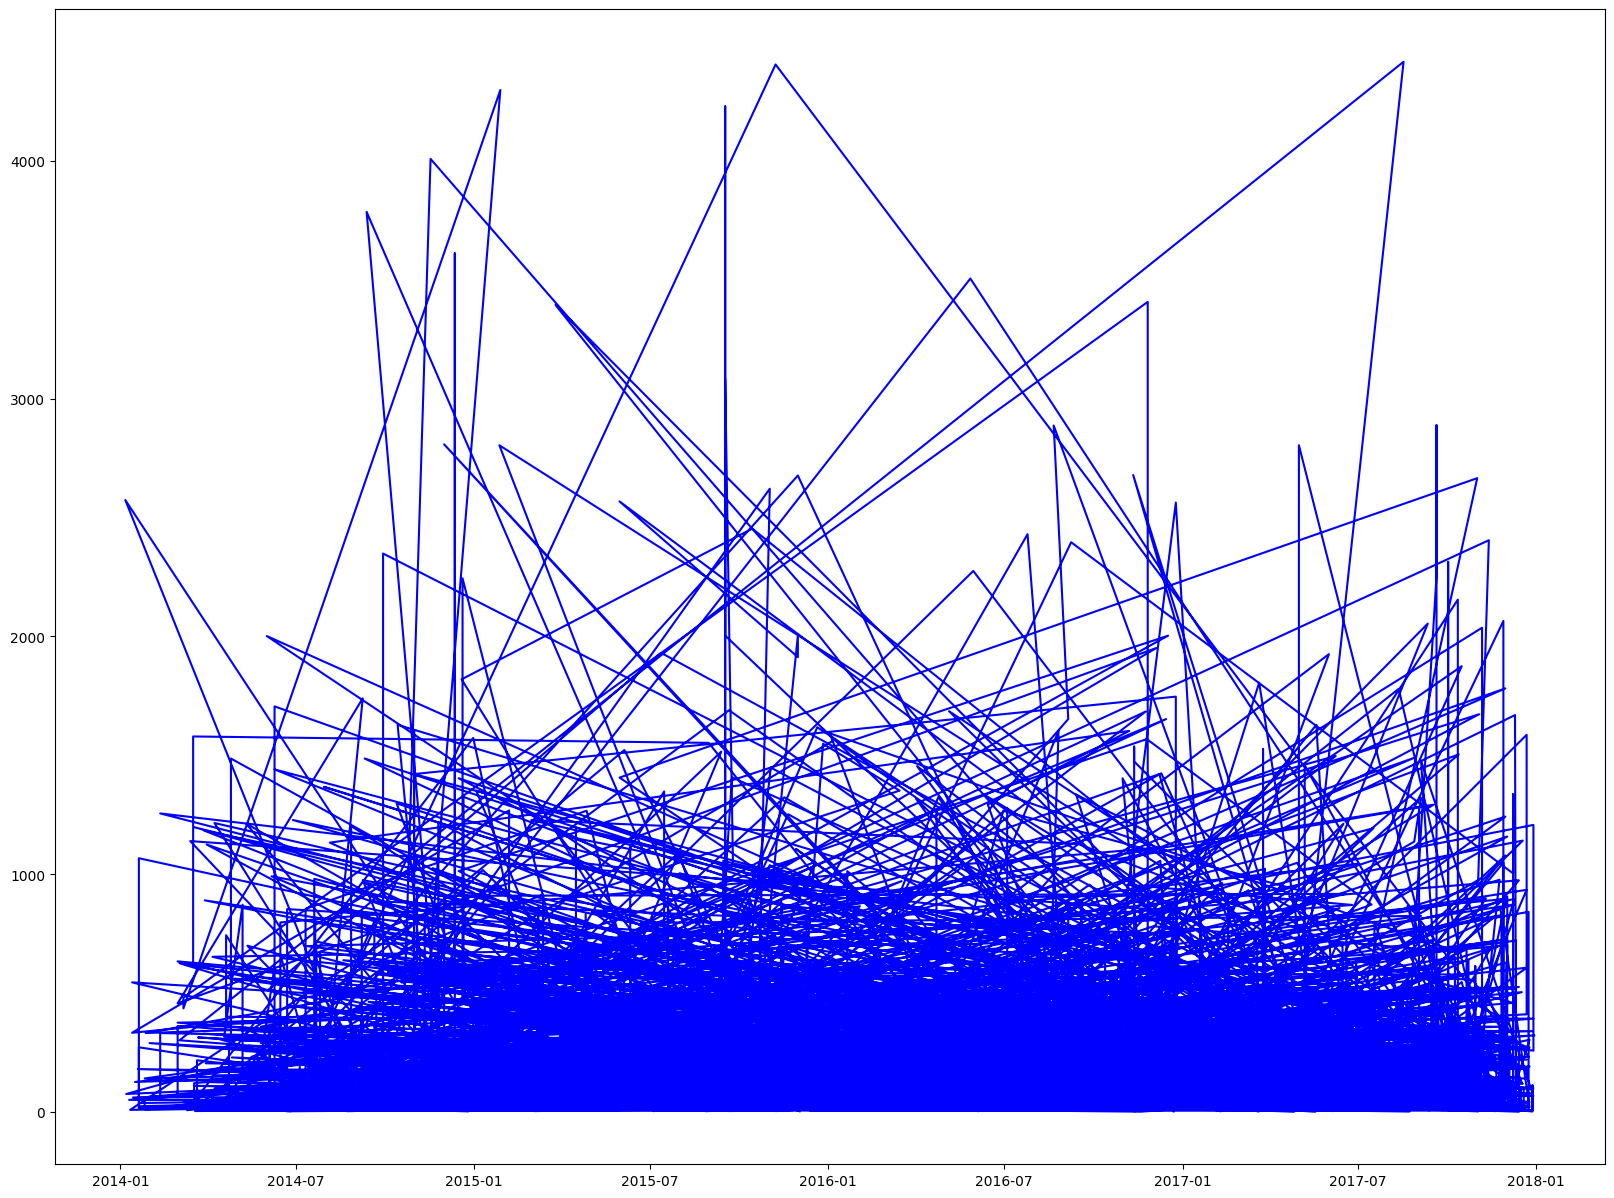

In [27]:
import matplotlib.pyplot as plt
# Plot the time series
plt.figure(figsize=(20, 15))
plt.plot(df.index, df["Sales"], label="Sales", color="blue")

In [30]:
min_date = df.index.min()
max_date = df.index.max()

print("Earliest Date:", min_date)
print("Latest Date:", max_date)

Earliest Date: 2014-01-06 00:00:00
Latest Date: 2017-12-30 00:00:00


In [33]:
total_days = (max_date - min_date).days + 1
print("Total Expected Days:", total_days)

Total Expected Days: 1455


In [34]:
print("Actual Rows in Data:", df.shape[0])

Actual Rows in Data: 2121


In [32]:
df.shape

(2121, 20)

In [35]:
duplicate_counts = df.index.value_counts()
duplicate_dates = duplicate_counts[duplicate_counts > 1]
print("Number of Duplicate Dates:", len(duplicate_dates))
print("Duplicate Dates:", duplicate_dates)

Number of Duplicate Dates: 536
Duplicate Dates: Order Date
2016-09-05    10
2016-12-01     9
2017-11-19     9
2017-10-30     9
2016-12-25     9
              ..
2014-07-11     2
2016-04-28     2
2015-07-05     2
2014-07-05     2
2015-03-16     2
Name: count, Length: 536, dtype: int64


In [37]:
# Count total duplicate occurrences (sum of all duplicates)
total_extra_occurrences = duplicate_dates.sum() - len(duplicate_dates)
print("Total Useless (Extra) Entries:", total_extra_occurrences)

Total Useless (Extra) Entries: 1232


In [44]:
no_duplicates_df = df

In [45]:
no_duplicates_df = no_duplicates_df.groupby(no_duplicates_df.index).sum()

In [240]:
no_duplicates_df.shape

(889, 20)

In [47]:
df.shape

(2121, 20)

In [50]:
new_df = new_df.reindex(pd.date_range(start=min_date, end=max_date, freq="D"), fill_value=0)

In [52]:
new_df.shape

(1455, 20)

In [242]:
NEW_df = no_duplicates_df.reindex(pd.date_range(start=min_date, end=max_date, freq="D"), fill_value=0)

In [245]:
NEW_df = NEW_df[['Sales', 'Discount']]

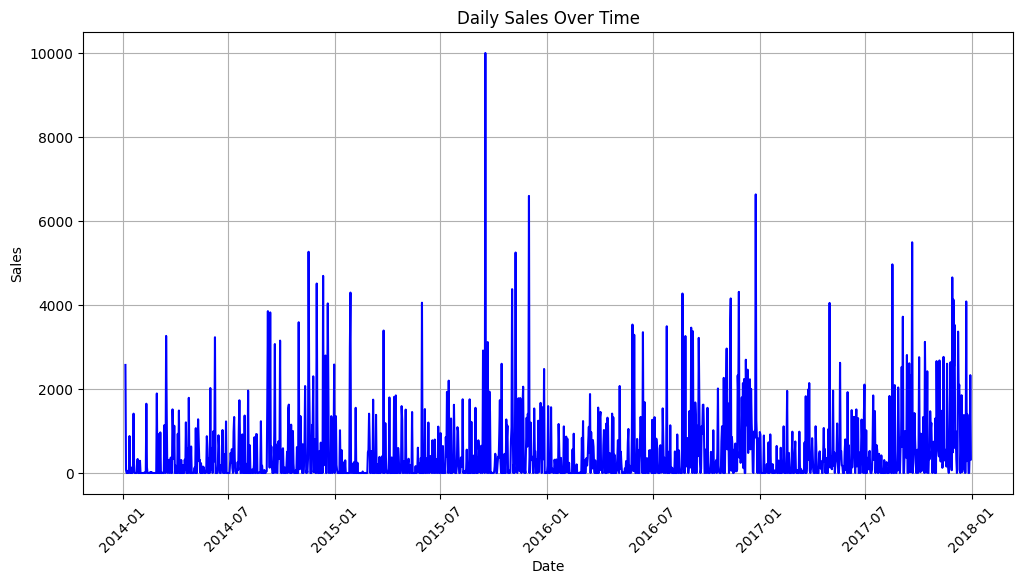

In [53]:
import matplotlib.pyplot as plt

# Plot Sales Over Time
plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['Sales'], color='b', linewidth=1.5)

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales Over Time")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

In [55]:
zero_sales_dates = new_df[new_df['Sales'] == 0]

print("Number of Days with Zero Sales:", zero_sales_dates.shape[0])

Number of Days with Zero Sales: 566


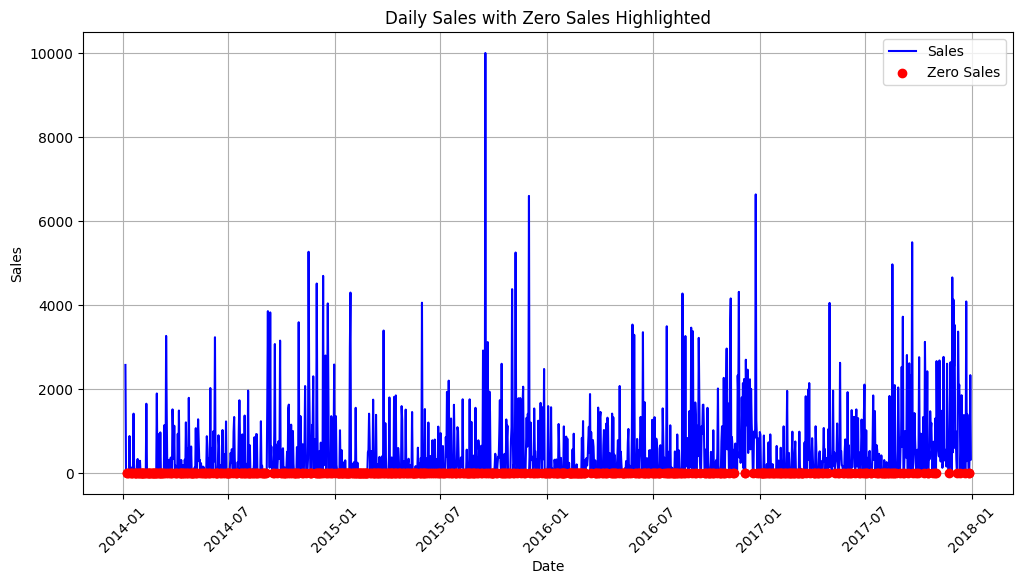

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['Sales'], color='b', linewidth=1.5, label="Sales")

# Mark zero sales days
plt.scatter(zero_sales_dates.index, zero_sales_dates['Sales'], color='r', label="Zero Sales", zorder=3)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales with Zero Sales Highlighted")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [59]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("#lags used:", result[2])
    print("# observations used:", result[3])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

In [63]:
new_df = new_df['Sales']

In [64]:
# Check stationarity
adf_test(new_df)

ADF Statistic: -5.917414423436162
p-value: 2.553372489400538e-07
#lags used: 17
# observations used: 1437
The series is stationary.


<Figure size 1000x500 with 0 Axes>

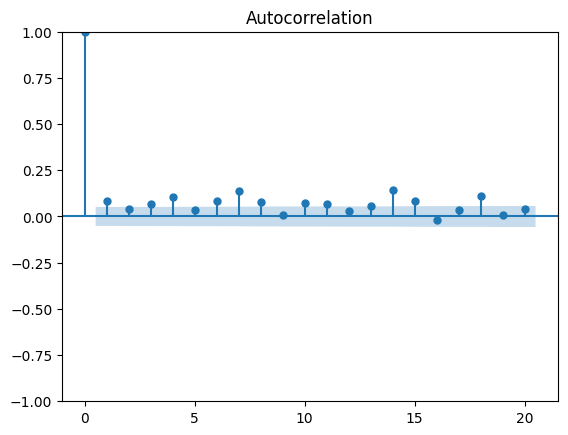

<Figure size 1000x500 with 0 Axes>

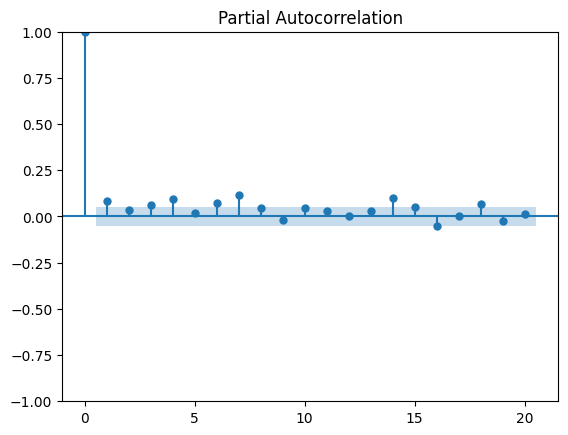

In [65]:
# Plot ACF (Autocorrelation Function)
plt.figure(figsize=(10, 5))
plot_acf(new_df, lags=20)
plt.show()

# Plot PACF (Partial Autocorrelation Function)
plt.figure(figsize=(10, 5))
plot_pacf(new_df, lags=20)
plt.show()

In [66]:
# Automatically find optimal ARIMA parameters
auto_arima_model = auto_arima(new_df, seasonal=False, trace=True, suppress_warnings=True)
print(auto_arima_model.summary())

# Extract optimal p, d, q values
optimal_p, optimal_d, optimal_q = auto_arima_model.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24766.208, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24392.156, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23837.934, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24764.211, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23839.597, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=23839.574, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23841.397, Time=0.96 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=23836.325, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=23838.013, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=23837.991, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=24390.156, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=23837.844, Time=0.51 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.277 seconds
               

# MODEL

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Split the data into training (80%) and test (20%) sets
train_size = int(len(new_df) * 0.8)
train, test = new_df[:train_size], new_df[train_size:]

# Step 2: Fit the ARIMA model on the training set
model_ARIMA = ARIMA(train, order=(0, 1, 1))
model_arima1 = model_ARIMA.fit()

In [76]:
train.shape

(1164,)

In [77]:
test.shape

(291,)

Mean Absolute Error (MAE): 614.8140150760134
Mean Squared Error (MSE): 1122928.8081777187
Root Mean Squared Error (RMSE): 1059.683352788803


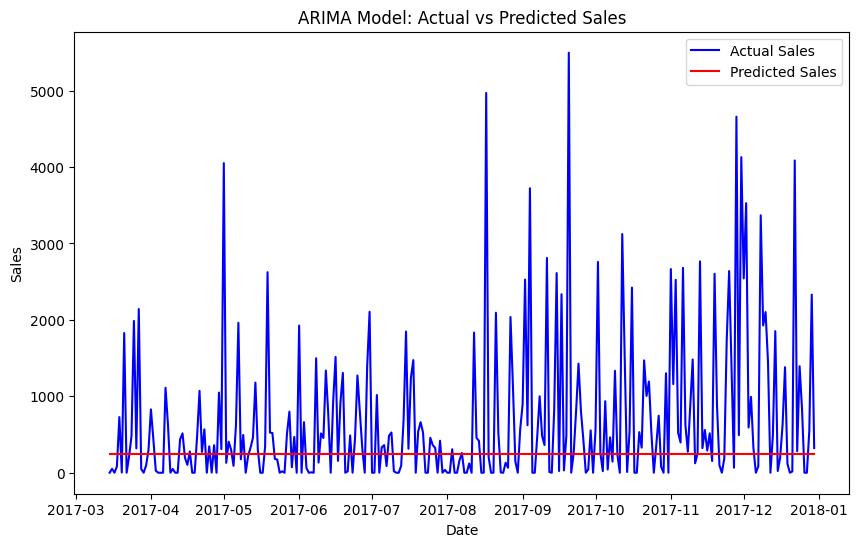

In [83]:
# Step 3: Make predictions on the test set
predictions = model_arima1.forecast(steps=len(test))

# Step 4: Evaluate the model's performance on the test set
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Step 5: Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales', color='red')
plt.title('ARIMA Model: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import r2_score
# Calculate R² score
r2 = r2_score(test, predictions)
print(f"R² Score: {r2}")

R² Score: -0.21408157998531774


In [80]:
predictions.shape

(291,)

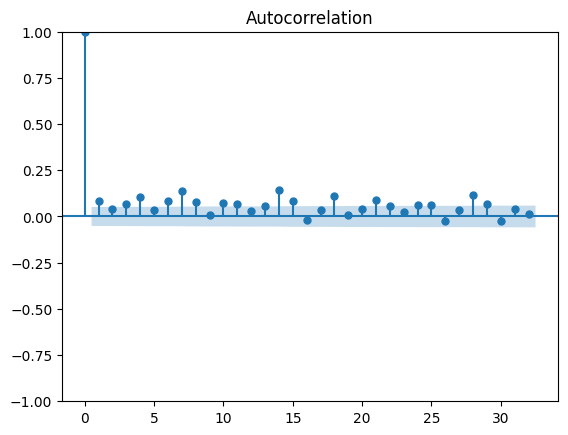

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(new_df)
plt.show()

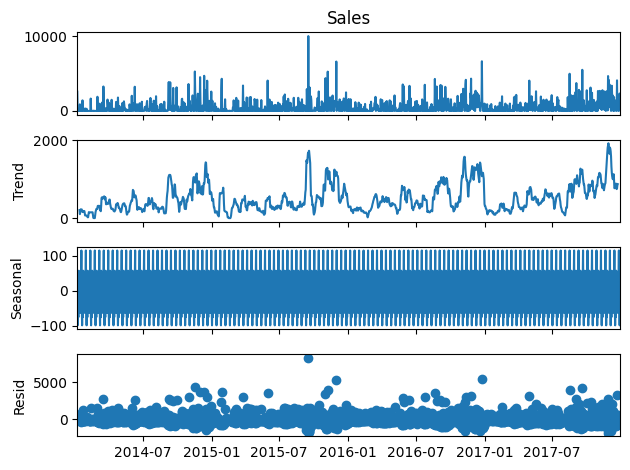

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Use additive model for decomposition as the data contains zero sales
decomposition = seasonal_decompose(new_df, model='additive', period=12)  # period=12 for yearly seasonality in monthly data
decomposition.plot()
plt.show()

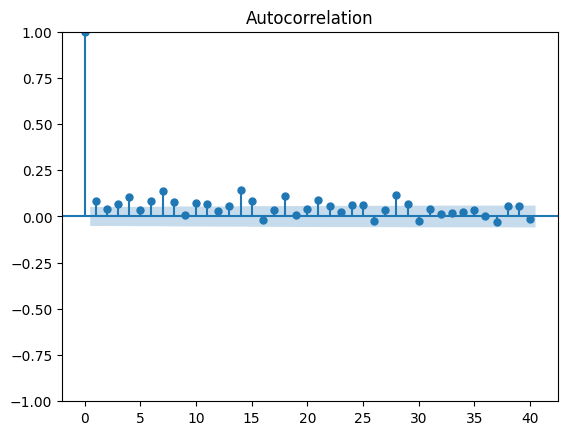

In [90]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF to find the seasonal period
plot_acf(new_df, lags=40)  # Adjust the number of lags as needed
plt.show()


Mean Absolute Error (MAE): 618.2202601084506
Mean Squared Error (MSE): 1144331.7564161755
Root Mean Squared Error (RMSE): 1069.7344326589546


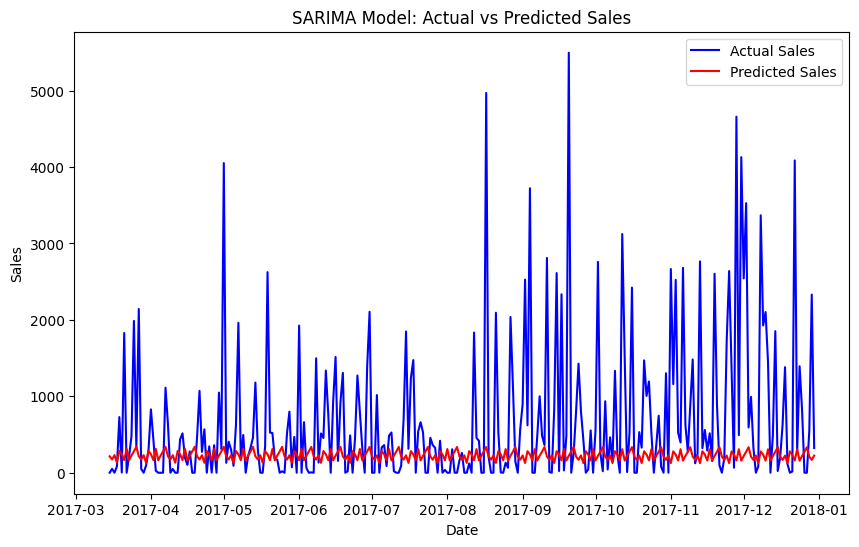

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Split the data into training (80%) and test (20%) sets
train_size = int(len(new_df) * 0.8)
train, test = new_df[:train_size], new_df[train_size:]

# Step 2: Fit the SARIMA model on the training set
# Let's assume seasonality is 12 months, so S = 12 for monthly data with yearly seasonality
model_SARIMA = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
model_sarima1 = model_SARIMA.fit()

# Step 3: Make predictions on the test set
predictions_sarima = model_sarima1.forecast(steps=len(test))

# Step 4: Evaluate the model's performance on the test set
mae_sarima = mean_absolute_error(test, predictions_sarima)
mse_sarima = mean_squared_error(test, predictions_sarima)
rmse_sarima = np.sqrt(mse_sarima)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae_sarima}')
print(f'Mean Squared Error (MSE): {mse_sarima}')
print(f'Root Mean Squared Error (RMSE): {rmse_sarima}')

# Step 5: Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual Sales', color='blue')
plt.plot(test.index, predictions_sarima, label='Predicted Sales', color='red')
plt.title('SARIMA Model: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import r2_score
# Calculate R² score
r2 = r2_score(test, predictions_sarima)
print(f"R² Score: {r2}")

R² Score: -0.23722189397891635


In [179]:
new_df.shape

(1455,)

In [181]:
monthly_data.shape

(48,)

C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\R

Best SARIMA parameters: (0, 1, 2, 0, 1, 1, 12) with AIC: 23457.145743008714


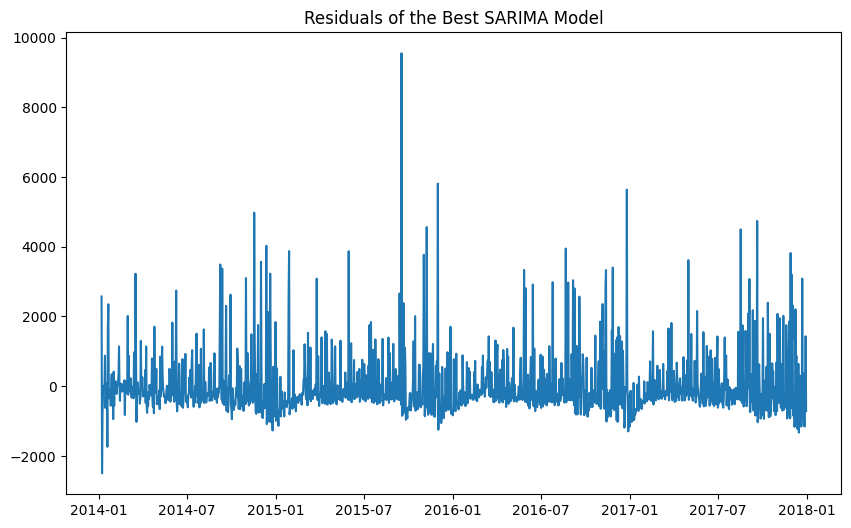

In [182]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt

# Define the parameter grid
p = q = range(0, 3)
d = range(0, 2)
P = Q = range(0, 2)
D = range(0, 2)
S = [12]  # seasonal period for monthly data (12 for yearly seasonality)

# Create a list of all possible combinations of the parameters
param_grid = list(itertools.product(p, d, q, P, D, Q, S))

# Store AIC for each combination
results = []

for params in param_grid:
    try:
        # Fit SARIMA model with given parameters
        model = SARIMAX(new_df,
                        order=(params[0], params[1], params[2]),
                        seasonal_order=(params[3], params[4], params[5], params[6]),
                        enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)
        results.append((params, result.aic))
    except Exception as e:
        continue  # Skip models that cannot be fit

# Sort the results by AIC
results.sort(key=lambda x: x[1])

# Get the best parameter combination
best_params = results[0]
print(f"Best SARIMA parameters: {best_params[0]} with AIC: {best_params[1]}")

# Plot the residuals of the best model
best_model = SARIMAX(new_df,
                     order=(best_params[0][0], best_params[0][1], best_params[0][2]),
                     seasonal_order=(best_params[0][3], best_params[0][4], best_params[0][5], best_params[0][6]),
                     enforce_stationarity=False, enforce_invertibility=False)
best_result = best_model.fit(disp=False)

# Residual plot
plt.figure(figsize=(10, 6))
plt.plot(best_result.resid)
plt.title('Residuals of the Best SARIMA Model')
plt.show()

In [183]:
train_data.shape

(38,)

In [222]:
new_df_no_outliers=new_df_no_outliers['Sales']

In [223]:
# Split into train and test data (80% training, 20% testing)
train_size_daily = int(len(new_df_no_outliers) * 0.8)
train_daily, test_daily = new_df_no_outliers[:train_size_daily], new_df_no_outliers[train_size_daily:]

In [224]:
new_df_no_outliers.shape

(1417,)

In [225]:
train_daily.shape

(1133,)

C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

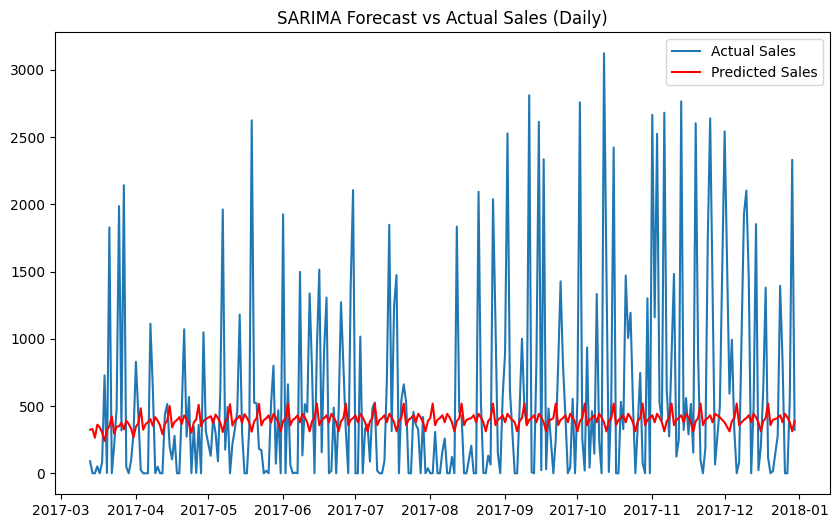

R² Score for SARIMA (Daily Data): -0.061407740385521103


In [229]:
# Fit SARIMA model (adjust p, d, q, P, D, Q, and seasonal period based on your data)
# Let's assume seasonality is yearly (period=12 for monthly data)
sarima_model = SARIMAX(train_daily, 
                      order=(2, 0, 2),  # (p, d, q)
                      seasonal_order=(1, 1, 1, 12),  # (P, D, Q, S) - S=12 for yearly seasonality
                      enforce_stationarity=False, 
                      enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Make predictions on the test data
predictions_daily = sarima_result.forecast(len(test_daily))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_daily.index, test_daily, label='Actual Sales')
plt.plot(test_daily.index, predictions_daily, label='Predicted Sales', color='red')
plt.legend()
plt.title('SARIMA Forecast vs Actual Sales (Daily)')
plt.show()

# Calculate R² score
r2 = r2_score(test_daily, predictions_daily)
print(f"R² Score for SARIMA (Daily Data): {r2}")

ACF Values and Corresponding Lags:
Lag 0: ACF = 1.0
Lag 1: ACF = 0.09289935043895732
Lag 2: ACF = 0.01342160580736726
Lag 3: ACF = 0.08580958681879292
Lag 4: ACF = 0.03458914754508833
Lag 5: ACF = 0.04877269407781551
Lag 6: ACF = 0.09531251852837366
Lag 7: ACF = 0.1582493935335779
Lag 8: ACF = 0.04874365370515939
Lag 9: ACF = 0.05228376585912536
Lag 10: ACF = 0.10603909670299952
Lag 11: ACF = 0.006394312362957271
Lag 12: ACF = 0.02476028000872382
Lag 13: ACF = 0.09268743926871509
Lag 14: ACF = 0.11658425601204682
Lag 15: ACF = 0.050729714218887695
Lag 16: ACF = -0.03409966472401001
Lag 17: ACF = 0.05572338594023299
Lag 18: ACF = 0.052891447956495495
Lag 19: ACF = 0.011714093589565556
Lag 20: ACF = 0.08760464788159592
Lag 21: ACF = 0.03524435054371376
Lag 22: ACF = 0.014215248789871113
Lag 23: ACF = 0.046540645827601604
Lag 24: ACF = 0.024250878284983856
Lag 25: ACF = -0.0021404260149585435
Lag 26: ACF = 0.00040571246271420665
Lag 27: ACF = 0.05964497676653607
Lag 28: ACF = 0.0307132045

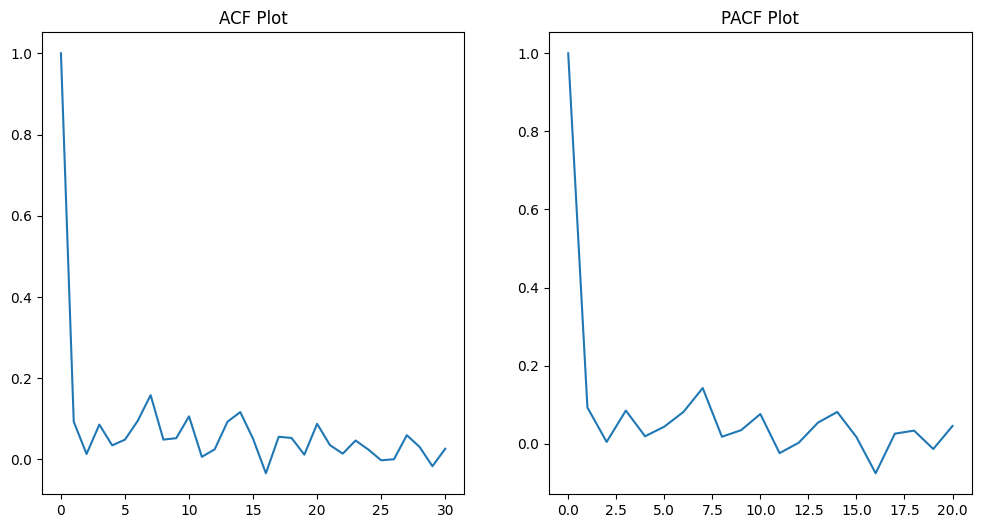

In [228]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Calculate ACF and PACF values
acf_values = acf(train_daily, nlags=30)
pacf_values = pacf(train_daily, nlags=20)

# Print ACF and PACF values with corresponding lags
print("ACF Values and Corresponding Lags:")
for i in range(len(acf_values)):
    print(f"Lag {i}: ACF = {acf_values[i]}")

print("\nPACF Values and Corresponding Lags:")
for i in range(len(pacf_values)):
    print(f"Lag {i}: PACF = {pacf_values[i]}")

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf_values)
plt.title("ACF Plot")
plt.subplot(122)
plt.plot(pacf_values)
plt.title("PACF Plot")
plt.show()

C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

Best SARIMA parameters: (1, 1, 2, 0, 1, 1, 12) with AIC: 17233.28949266006


C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


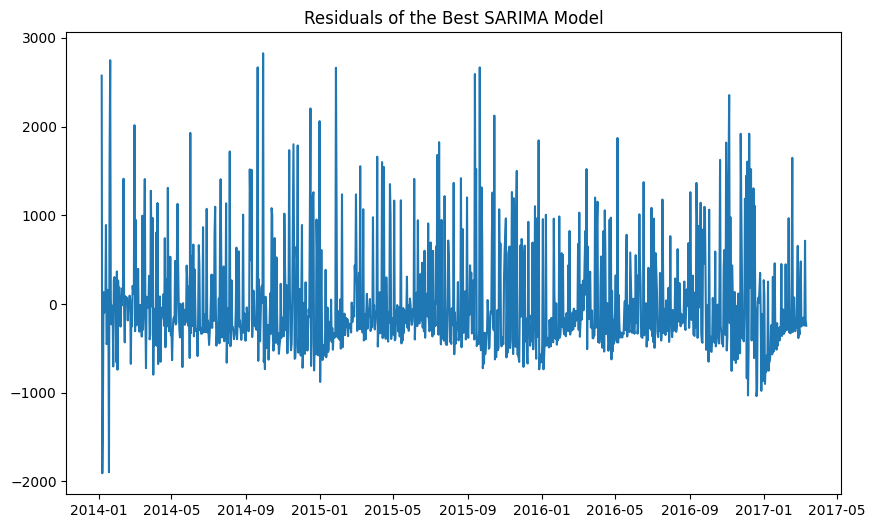

In [230]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt

# Define the parameter grid
p = q = range(0, 3)
d = range(0, 2)
P = Q = range(0, 2)
D = range(0, 2)
S = [12]  # seasonal period for monthly data (12 for yearly seasonality)

# Create a list of all possible combinations of the parameters
param_grid = list(itertools.product(p, d, q, P, D, Q, S))

# Store AIC for each combination
results = []

for params in param_grid:
    try:
        # Fit SARIMA model with given parameters
        model = SARIMAX(train_daily,
                        order=(params[0], params[1], params[2]),
                        seasonal_order=(params[3], params[4], params[5], params[6]),
                        enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)
        results.append((params, result.aic))
    except Exception as e:
        continue  # Skip models that cannot be fit

# Sort the results by AIC
results.sort(key=lambda x: x[1])

# Get the best parameter combination
best_params = results[0]
print(f"Best SARIMA parameters: {best_params[0]} with AIC: {best_params[1]}")

# Plot the residuals of the best model
best_model = SARIMAX(train_daily,
                     order=(best_params[0][0], best_params[0][1], best_params[0][2]),
                     seasonal_order=(best_params[0][3], best_params[0][4], best_params[0][5], best_params[0][6]),
                     enforce_stationarity=False, enforce_invertibility=False)
best_result = best_model.fit(disp=False)

# Residual plot
plt.figure(figsize=(10, 6))
plt.plot(best_result.resid)
plt.title('Residuals of the Best SARIMA Model')
plt.show()

C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

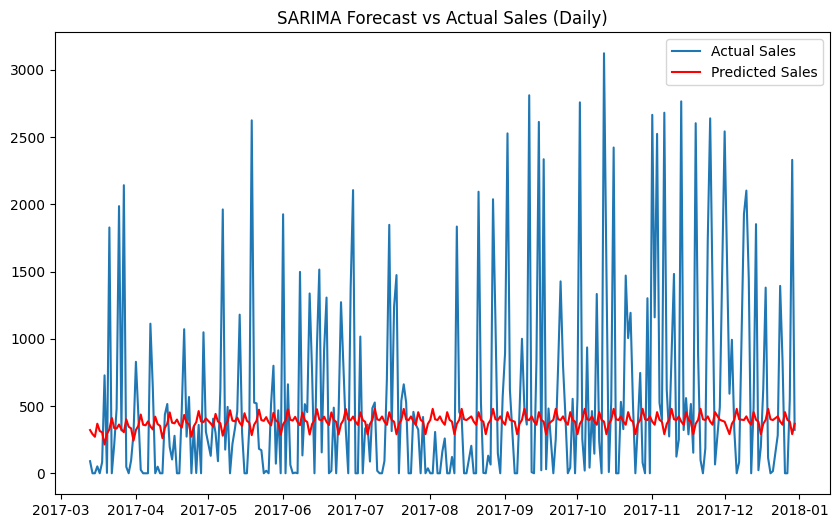

R² Score for SARIMA (Daily Data): -0.07154132416576853


In [232]:
# Fit SARIMA model (adjust p, d, q, P, D, Q, and seasonal period based on your data)
# Let's assume seasonality is yearly (period=12 for monthly data)
sarima_model = SARIMAX(train_daily, 
                      order=(1, 0, 2),  # (p, d, q)
                      seasonal_order=(0, 1, 1, 12),  # (P, D, Q, S) - S=12 for yearly seasonality
                      enforce_stationarity=False, 
                      enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Make predictions on the test data
predictions_daily = sarima_result.forecast(len(test_daily))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_daily.index, test_daily, label='Actual Sales')
plt.plot(test_daily.index, predictions_daily, label='Predicted Sales', color='red')
plt.legend()
plt.title('SARIMA Forecast vs Actual Sales (Daily)')
plt.show()

# Calculate R² score
r2 = r2_score(test_daily, predictions_daily)
print(f"R² Score for SARIMA (Daily Data): {r2}")

In [199]:
df.shape

(2121, 20)

In [200]:
no_duplicates_df.shape

(889, 20)

In [207]:
DF = no_duplicates_df.reindex(pd.date_range(start=min_date, end=max_date, freq="D"), fill_value=0)

In [208]:
DF.shape

(1455, 20)

In [209]:
from scipy.stats import zscore

# Calculate the Z-score for each data point
DF['z_score'] = zscore(DF['Sales'])

# Set a threshold for Z-score, for example, values greater than 3 are considered outliers
threshold = 3

# Filter the data by removing outliers based on Z-score
new_df_no_outliers = DF[DF['z_score'].abs() <= threshold]

# Check the size of the new DataFrame
print(f"Original data size: {DF.shape[0]}, Data size after removing outliers: {new_df_no_outliers.shape[0]}")


Original data size: 1455, Data size after removing outliers: 1417


In [211]:
DF = DF['Sales']

In [196]:
new_df.shape

(1456,)

In [96]:
# Resample the data to monthly frequency by summing the sales for each month
monthly_data = new_df.resample('M').sum()  # 'M' stands for month

C:\Users\91867\AppData\Local\Temp\ipykernel_11984\3854429039.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = new_df.resample('M').sum()  # 'M' stands for month


In [99]:
monthly_data.shape

(48,)

In [100]:
monthly_data.head()

2014-01-31     6242.525
2014-02-28     1839.658
2014-03-31    14573.956
2014-04-30     7944.837
2014-05-31     6912.787
Freq: ME, Name: Sales, dtype: float64

In [101]:
# Split into train and test data (80% training, 20% testing)
train_size = int(len(monthly_data) * 0.8)
train_data, test_data = monthly_data[:train_size], monthly_data[train_size:]

In [102]:
# Fit ARIMA or SARIMA model on the train data (assuming you already have your model)
model = ARIMA(train_data, order=(0, 1, 1))  # Adjust order based on your model
model_fit = model.fit()

In [103]:
# Make predictions on the test data
predictions = model_fit.forecast(len(test_data))

In [104]:
# Calculate the R² score
from sklearn.metrics import r2_score
r2 = r2_score(test_data, predictions)

print(f"R² Score for Monthly Data: {r2}")

R² Score for Monthly Data: -0.18215694917947722


C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


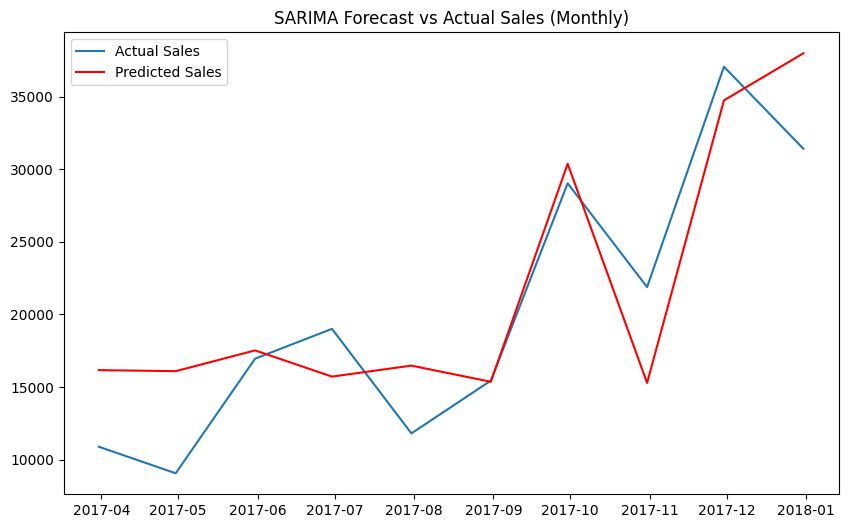

R² Score for SARIMA (Monthly Data): 0.7468796230477716


In [111]:
# Split the data into train and test (80% for training and 20% for testing)
train_size = int(len(monthly_data) * 0.8)
train_data, test_data = monthly_data[:train_size], monthly_data[train_size:]

# Fit SARIMA model (adjust p, d, q, P, D, Q, and seasonal period based on your data)
# Let's assume seasonality is yearly (period=12 for monthly data)
sarima_model = SARIMAX(train_data, 
                      order=(0, 1, 1),  # (p, d, q)
                      seasonal_order=(0, 1, 1, 12),  # (P, D, Q, S) - S=12 for yearly seasonality
                      enforce_stationarity=False, 
                      enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Make predictions on the test data
predictions = sarima_result.forecast(len(test_data))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, predictions, label='Predicted Sales', color='red')
plt.legend()
plt.title('SARIMA Forecast vs Actual Sales (Monthly)')
plt.show()

# Calculate R² score
r2 = r2_score(test_data, predictions)
print(f"R² Score for SARIMA (Monthly Data): {r2}")

C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


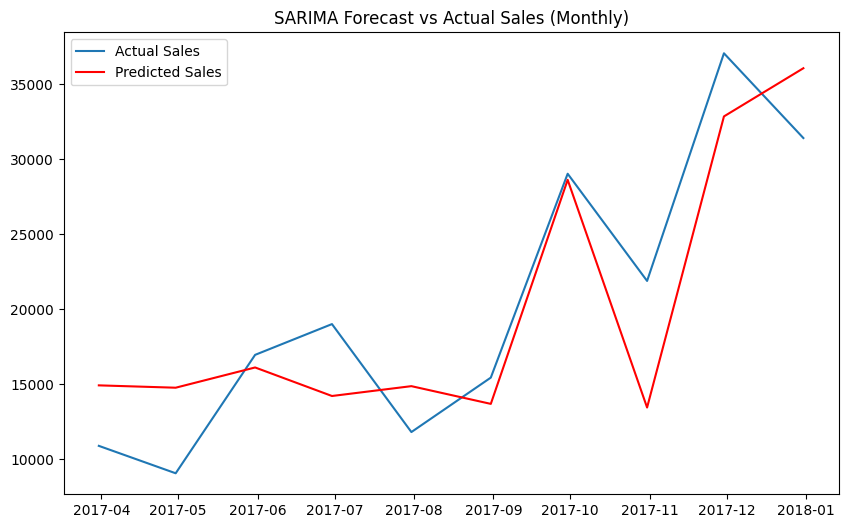

R² Score for SARIMA (Monthly Data): 0.7573747971010709


In [146]:
# Fit SARIMA model (adjust p, d, q, P, D, Q, and seasonal period based on your data)
# Let's assume seasonality is yearly (period=12 for monthly data)
sarima_model = SARIMAX(train_data, 
                      order=(1, 0, 1),  # (p, d, q)
                      seasonal_order=(0, 1, 1, 12),  # (P, D, Q, S) - S=12 for yearly seasonality
                      enforce_stationarity=False, 
                      enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Make predictions on the test data
predictions = sarima_result.forecast(len(test_data))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, predictions, label='Predicted Sales', color='red')
plt.legend()
plt.title('SARIMA Forecast vs Actual Sales (Monthly)')
plt.show()

# Calculate R² score
r2 = r2_score(test_data, predictions)
print(f"R² Score for SARIMA (Monthly Data): {r2}")


In [113]:
import pmdarima as pm

# Fit the AutoARIMA model to the data
auto_model = pm.auto_arima(monthly_data, 
                           seasonal=True, 
                           m=12,  # Set m=12 for yearly seasonality in monthly data
                           stepwise=True,  # Stepwise search for optimal parameters
                           trace=True)  # Display progress of the search

# Print the best model summary
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=715.201, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=708.796, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=709.325, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=709.756, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=711.529, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=707.976, Time=0.03 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=707.744, Time=0.10 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=709.738, Time=0.16 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=709.855, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=709.579, Time=0.13 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=709.985, Time=0.14 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=711.977, Time=0.20 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=708.710, Time=0.08 sec

Best model:  ARIMA(0,0,0)(2,1,0)[12] intercept
Total fit time: 1.390 seconds
                     

In [121]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(monthly_data)

# Extract the p-value from the result
p_value = result[1]

# Check stationarity based on the p-value
if p_value < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

The time series is stationary.


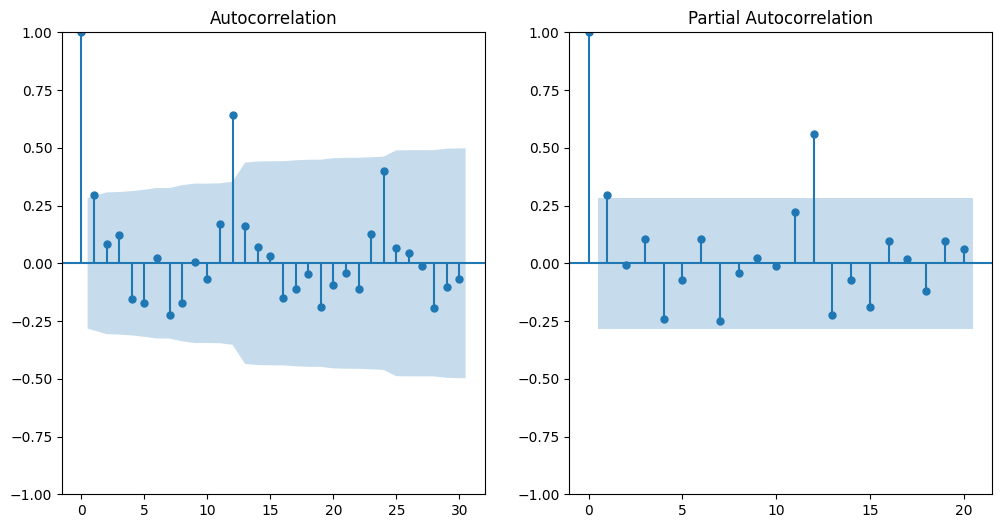

In [129]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(monthly_data, lags=30, ax=plt.gca())
plt.subplot(122)
plot_pacf(monthly_data, lags=20, ax=plt.gca())
plt.show()

ACF Values and Corresponding Lags:
Lag 0: ACF = 1.0
Lag 1: ACF = 0.29661273054673326
Lag 2: ACF = 0.08274856770653673
Lag 3: ACF = 0.12073437220373073
Lag 4: ACF = -0.15382530080897386
Lag 5: ACF = -0.17238306482869817
Lag 6: ACF = 0.02459549979573917
Lag 7: ACF = -0.22480012209621392
Lag 8: ACF = -0.17335760575322798
Lag 9: ACF = 0.007623427492851303
Lag 10: ACF = -0.06631877852054556
Lag 11: ACF = 0.1714330880191526
Lag 12: ACF = 0.6398557292338962
Lag 13: ACF = 0.16342547891380718
Lag 14: ACF = 0.06964897721855547
Lag 15: ACF = 0.029422278559351395
Lag 16: ACF = -0.15128685982602444
Lag 17: ACF = -0.11185479740892146
Lag 18: ACF = -0.04438604360360905
Lag 19: ACF = -0.19023079472499563
Lag 20: ACF = -0.09382594160121235
Lag 21: ACF = -0.04122280036990491
Lag 22: ACF = -0.1099408865076471
Lag 23: ACF = 0.1287590624492478
Lag 24: ACF = 0.4004812711429327
Lag 25: ACF = 0.06755038171319903
Lag 26: ACF = 0.043412527900735985
Lag 27: ACF = -0.011092446178381194
Lag 28: ACF = -0.1952164222

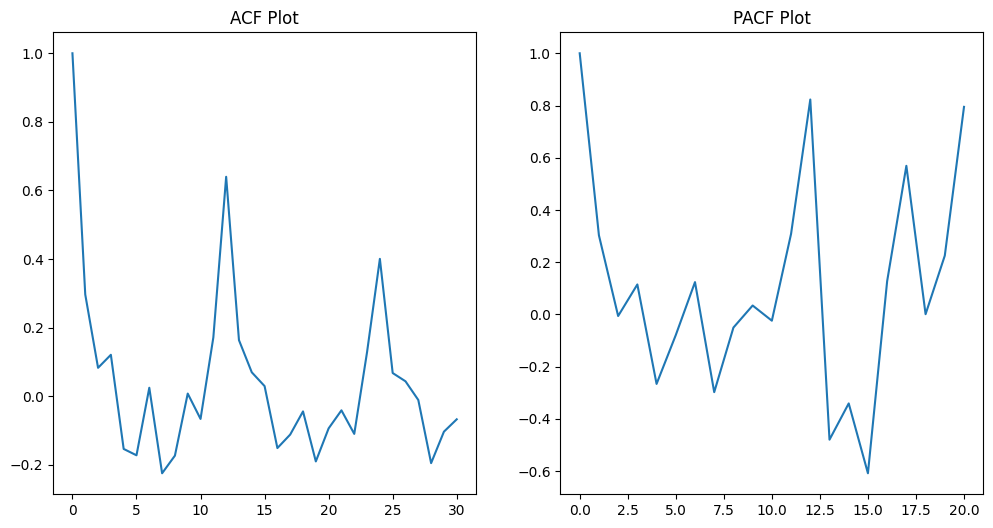

In [131]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Calculate ACF and PACF values
acf_values = acf(monthly_data, nlags=30)
pacf_values = pacf(monthly_data, nlags=20)

# Print ACF and PACF values with corresponding lags
print("ACF Values and Corresponding Lags:")
for i in range(len(acf_values)):
    print(f"Lag {i}: ACF = {acf_values[i]}")

print("\nPACF Values and Corresponding Lags:")
for i in range(len(pacf_values)):
    print(f"Lag {i}: PACF = {pacf_values[i]}")

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf_values)
plt.title("ACF Plot")
plt.subplot(122)
plt.plot(pacf_values)
plt.title("PACF Plot")
plt.show()

C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

Best SARIMA parameters: (0, 1, 2, 1, 1, 1, 12) with AIC: 399.6714759956661


C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


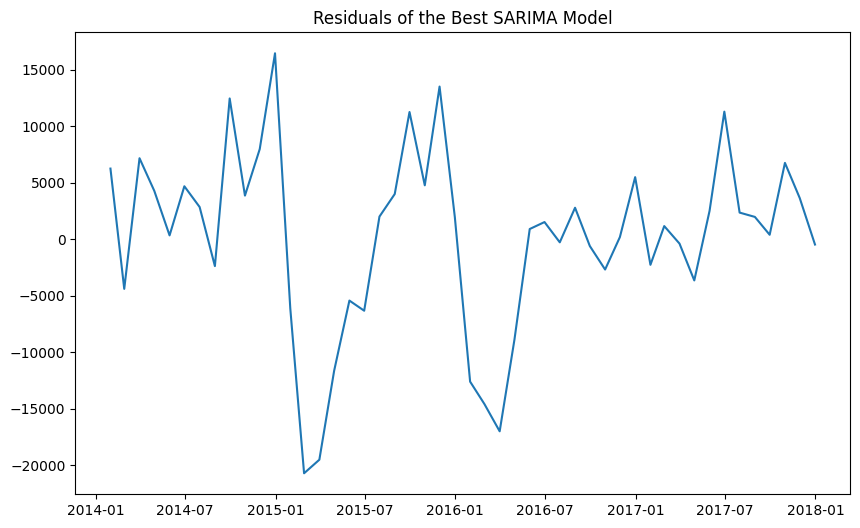

In [151]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt

# Define the parameter grid
p = q = range(0, 3)
d = range(0, 2)
P = Q = range(0, 2)
D = range(0, 2)
S = [12]  # seasonal period for monthly data (12 for yearly seasonality)

# Create a list of all possible combinations of the parameters
param_grid = list(itertools.product(p, d, q, P, D, Q, S))

# Store AIC for each combination
results = []

for params in param_grid:
    try:
        # Fit SARIMA model with given parameters
        model = SARIMAX(monthly_data,
                        order=(params[0], params[1], params[2]),
                        seasonal_order=(params[3], params[4], params[5], params[6]),
                        enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)
        results.append((params, result.aic))
    except Exception as e:
        continue  # Skip models that cannot be fit

# Sort the results by AIC
results.sort(key=lambda x: x[1])

# Get the best parameter combination
best_params = results[0]
print(f"Best SARIMA parameters: {best_params[0]} with AIC: {best_params[1]}")

# Plot the residuals of the best model
best_model = SARIMAX(monthly_data,
                     order=(best_params[0][0], best_params[0][1], best_params[0][2]),
                     seasonal_order=(best_params[0][3], best_params[0][4], best_params[0][5], best_params[0][6]),
                     enforce_stationarity=False, enforce_invertibility=False)
best_result = best_model.fit(disp=False)

# Residual plot
plt.figure(figsize=(10, 6))
plt.plot(best_result.resid)
plt.title('Residuals of the Best SARIMA Model')
plt.show()


C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


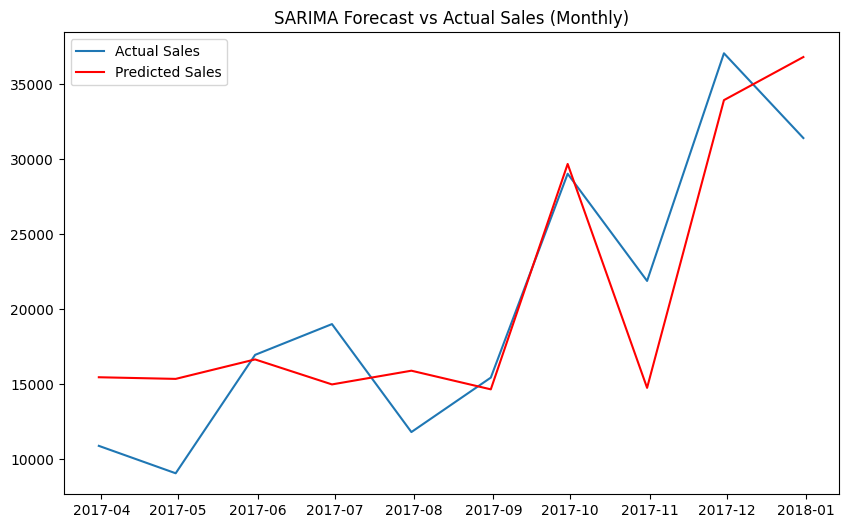

R² Score for SARIMA (Monthly Data): 0.7715097202362788


In [148]:
# Fit SARIMA model (adjust p, d, q, P, D, Q, and seasonal period based on your data)
# Let's assume seasonality is yearly (period=12 for monthly data)
sarima_model = SARIMAX(train_data, 
                      order=(0, 1, 2),  # (p, d, q)
                      seasonal_order=(0, 1, 1, 12),  # (P, D, Q, S) - S=12 for yearly seasonality
                      enforce_stationarity=False, 
                      enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Make predictions on the test data
predictions = sarima_result.forecast(len(test_data))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, predictions, label='Predicted Sales', color='red')
plt.legend()
plt.title('SARIMA Forecast vs Actual Sales (Monthly)')
plt.show()

# Calculate R² score
r2 = r2_score(test_data, predictions)
print(f"R² Score for SARIMA (Monthly Data): {r2}")


C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\R

Best SARIMA parameters: (0, 1, 2, 0, 1, 1, 12) with AIC: 23457.145743008714


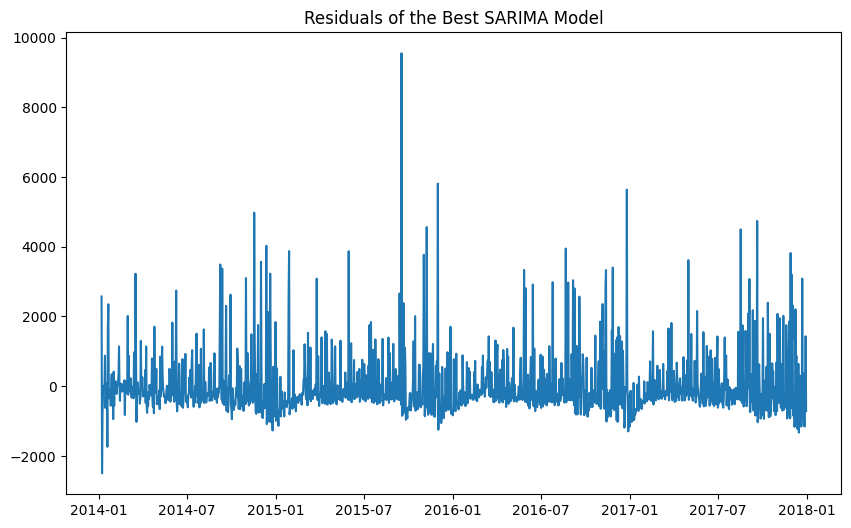

In [149]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt

# Define the parameter grid
p = q = range(0, 3)
d = range(0, 2)
P = Q = range(0, 2)
D = range(0, 2)
S = [12]  # seasonal period for monthly data (12 for yearly seasonality)

# Create a list of all possible combinations of the parameters
param_grid = list(itertools.product(p, d, q, P, D, Q, S))

# Store AIC for each combination
results = []

for params in param_grid:
    try:
        # Fit SARIMA model with given parameters
        model = SARIMAX(new_df,
                        order=(params[0], params[1], params[2]),
                        seasonal_order=(params[3], params[4], params[5], params[6]),
                        enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)
        results.append((params, result.aic))
    except Exception as e:
        continue  # Skip models that cannot be fit

# Sort the results by AIC
results.sort(key=lambda x: x[1])

# Get the best parameter combination
best_params = results[0]
print(f"Best SARIMA parameters: {best_params[0]} with AIC: {best_params[1]}")

# Plot the residuals of the best model
best_model = SARIMAX(new_df,
                     order=(best_params[0][0], best_params[0][1], best_params[0][2]),
                     seasonal_order=(best_params[0][3], best_params[0][4], best_params[0][5], best_params[0][6]),
                     enforce_stationarity=False, enforce_invertibility=False)
best_result = best_model.fit(disp=False)

# Residual plot
plt.figure(figsize=(10, 6))
plt.plot(best_result.resid)
plt.title('Residuals of the Best SARIMA Model')
plt.show()

C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


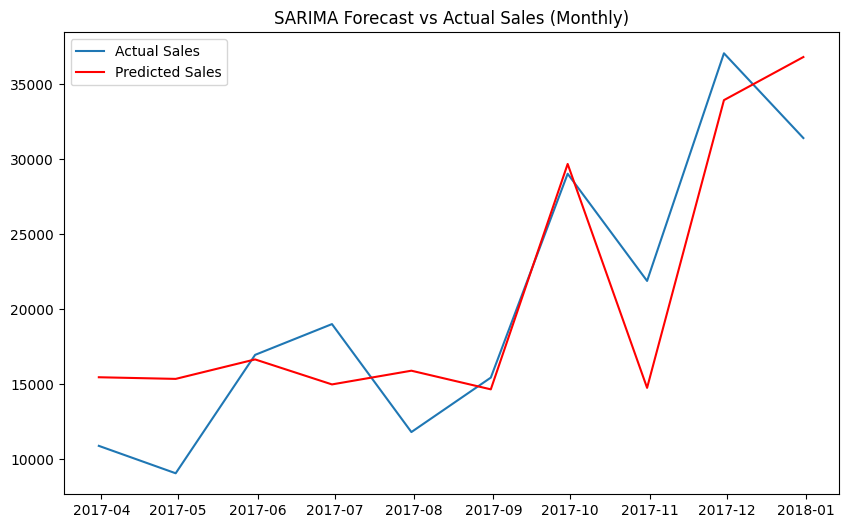

R² Score for SARIMA (Monthly Data): 0.7715097202362788


In [157]:
# Fit SARIMA model (adjust p, d, q, P, D, Q, and seasonal period based on your data)
# Let's assume seasonality is yearly (period=12 for monthly data)
sarima_model = SARIMAX(train_data, 
                      order=(0, 1, 2),  # (p, d, q)
                      seasonal_order=(0, 1, 1, 12),  # (P, D, Q, S) - S=12 for yearly seasonality
                      enforce_stationarity=False, 
                      enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Make predictions on the test data
predictions = sarima_result.forecast(len(test_data))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, predictions, label='Predicted Sales', color='red')
plt.legend()
plt.title('SARIMA Forecast vs Actual Sales (Monthly)')
plt.show()

# Calculate R² score
r2 = r2_score(test_data, predictions)
print(f"R² Score for SARIMA (Monthly Data): {r2}")


C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

Best SARIMA parameters: (0, 1, 2, 1, 1, 1, 12) with AIC: 204.0456700457438


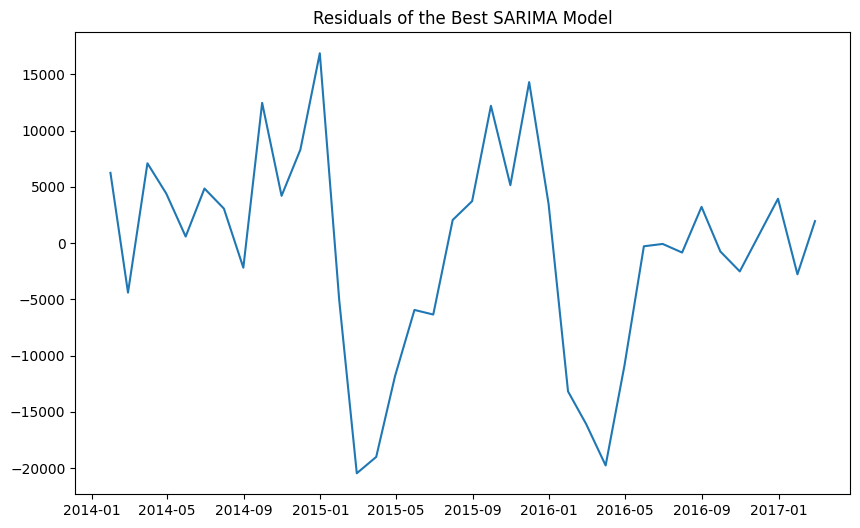

In [158]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt

# Define the parameter grid
p = q = range(0, 3)
d = range(0, 2)
P = Q = range(0, 2)
D = range(0, 2)
S = [12]  # seasonal period for monthly data (12 for yearly seasonality)

# Create a list of all possible combinations of the parameters
param_grid = list(itertools.product(p, d, q, P, D, Q, S))

# Store AIC for each combination
results = []

for params in param_grid:
    try:
        # Fit SARIMA model with given parameters
        model = SARIMAX(train_data,
                        order=(params[0], params[1], params[2]),
                        seasonal_order=(params[3], params[4], params[5], params[6]),
                        enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)
        results.append((params, result.aic))
    except Exception as e:
        continue  # Skip models that cannot be fit

# Sort the results by AIC
results.sort(key=lambda x: x[1])

# Get the best parameter combination
best_params = results[0]
print(f"Best SARIMA parameters: {best_params[0]} with AIC: {best_params[1]}")

# Plot the residuals of the best model
best_model = SARIMAX(train_data,
                     order=(best_params[0][0], best_params[0][1], best_params[0][2]),
                     seasonal_order=(best_params[0][3], best_params[0][4], best_params[0][5], best_params[0][6]),
                     enforce_stationarity=False, enforce_invertibility=False)
best_result = best_model.fit(disp=False)

# Residual plot
plt.figure(figsize=(10, 6))
plt.plot(best_result.resid)
plt.title('Residuals of the Best SARIMA Model')
plt.show()


C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


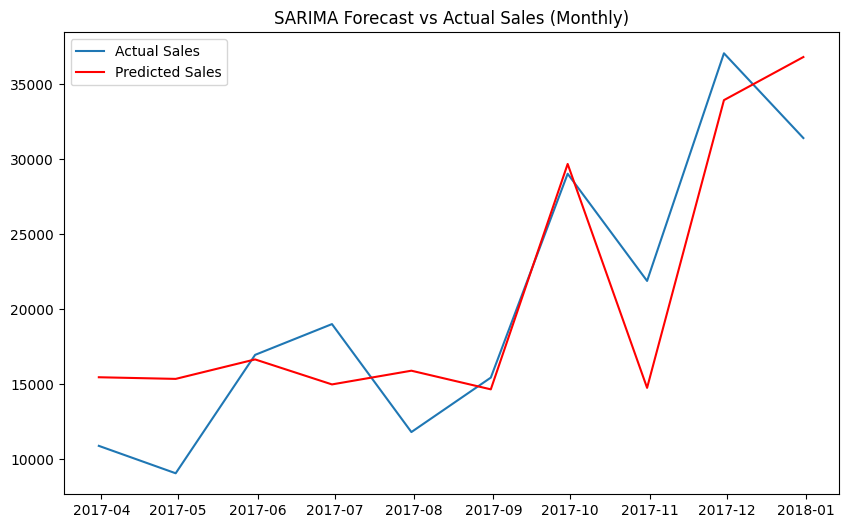

Mean Squared Error: 18416119.179282073
Root Mean Squared Error: 4291.40060810944


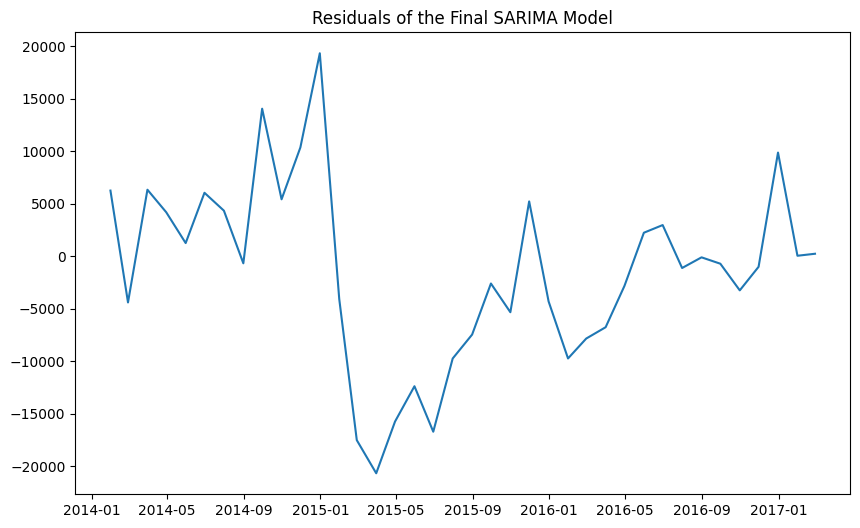

In [261]:
# Fit the SARIMA model with the best parameters on the full training data
final_model = SARIMAX(train_data,
                      order=(0, 1, 2),  # p, d, q
                      seasonal_order=(0, 1, 1, 12),  # P, D, Q, S
                      enforce_stationarity=False, 
                      enforce_invertibility=False)
final_result = final_model.fit(disp=False)

# Make forecasts on the test data
forecast_steps = len(test_data)
forecast = final_result.forecast(steps=forecast_steps)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, forecast, label='Predicted Sales', color='red')
plt.legend()
plt.title('SARIMA Forecast vs Actual Sales (Monthly)')
plt.show()

# Evaluate the model performance
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Residual analysis
residuals = final_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the Final SARIMA Model')
plt.show()

In [262]:
r2 = r2_score(test_data, forecast)
print(f"R² Score for SARIMA (Monthly Data): {r2}")

R² Score for SARIMA (Monthly Data): 0.7715097202362788


In [263]:
r2 = r2_score(test_data, forecast)
print(f"R² Score for SARIMA (Monthly Data): {r2}")

R² Score for SARIMA (Monthly Data): 0.7715097202362788


In [267]:
monthly_sales

2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30     9065.9581


In [268]:
future_dates

DatetimeIndex(['2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30'],
              dtype='datetime64[ns]', freq='ME')

In [276]:
# Forecast for next 12 months
forecast = final_result.forecast(steps=21)

# Create future date range
future_dates = pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M')

# Convert to DataFrame
forecast_df = pd.DataFrame({'Forecasted Sales': forecast}, index=future_dates)

# Display forecasted values
print(forecast_df)

            Forecasted Sales
2017-12-31      36806.624613
2018-01-31       9324.766444
2018-02-28       9074.905604
2018-03-31      17742.804389
2018-04-30      17607.409972
2018-05-31      18904.712872
2018-06-30      17238.863671
2018-07-31      18152.873730
2018-08-31      16910.343310
2018-09-30      31930.787265
2018-10-31      17009.610383
2018-11-30      36185.384871


C:\Users\91867\AppData\Local\Temp\ipykernel_11984\4054872931.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M')


# FINAL

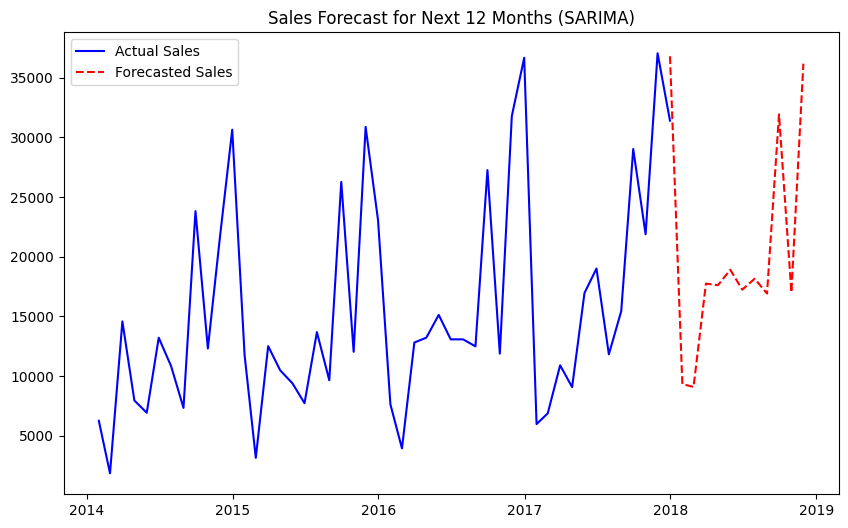

In [279]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red', linestyle='dashed')
plt.legend()
plt.title('Sales Forecast for Next 12 Months (SARIMA)')
plt.show()

In [234]:
monthly_data

2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30     9065.9581


In [246]:
NEW_df

,Sales,Discount
2014-01-06,2573.8200,0.00
2014-01-07,76.7280,0.60
2014-01-08,0.0000,0.00
2014-01-09,0.0000,0.00
2014-01-10,51.9400,0.00
...,...,...
2017-12-26,0.0000,0.00
2017-12-27,0.0000,0.00
2017-12-28,551.2568,2.02
2017-12-29,2330.7180,0.20


In [247]:
MONTHLY_df = NEW_df.resample('M').sum()

C:\Users\91867\AppData\Local\Temp\ipykernel_11984\2641043979.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  MONTHLY_df = NEW_df.resample('M').sum()


In [249]:
MONTHLY_df.shape

(48, 2)

In [251]:
monthly_discount = MONTHLY_df['Discount']

In [253]:
monthly_sales = MONTHLY_df['Sales']

C:\Users\91867\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


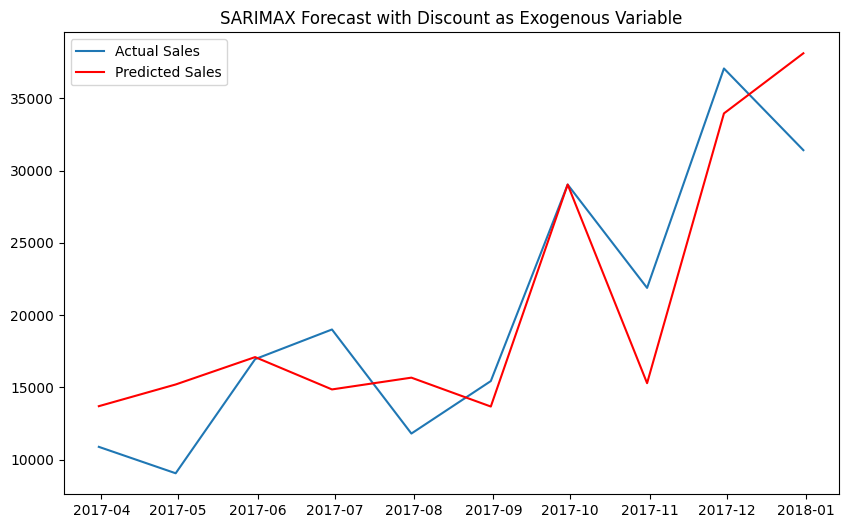

RMSE: 4228.5863372368185
MAE: 3526.436449042563
R²: 0.7781497016683565


In [255]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assume 'Discount' is the external variable influencing the sales
# Ensure 'Discount' is aligned with the target data (monthly in this case)
# Create the training and test datasets
train_data = monthly_sales.iloc[:int(len(monthly_sales) * 0.8)]  # 80% training data
test_data = monthly_sales.iloc[int(len(monthly_sales) * 0.8):]  # 20% test data
train_discount = monthly_discount.iloc[:int(len(monthly_discount) * 0.8)]
test_discount = monthly_discount.iloc[int(len(monthly_discount) * 0.8):]

# Fit the SARIMAX model with exogenous variable (Discount)
sarimax_model = SARIMAX(train_data,
                       exog=train_discount,  # Adding external variable
                       order=(0, 1, 2),  # Example ARIMA orders, adjust as needed
                       seasonal_order=(0, 1, 1, 12),  # Example seasonal order
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)

# Forecast on test data
predictions = sarimax_result.forecast(steps=len(test_data), exog=test_discount)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, predictions, label='Predicted Sales', color='red')
plt.legend()
plt.title('SARIMAX Forecast with Discount as Exogenous Variable')
plt.show()

# Evaluate the model using RMSE, MAE, and R²
rmse = mean_squared_error(test_data, predictions, squared=False)
mae = mean_absolute_error(test_data, predictions)
r2 = r2_score(test_data, predictions)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

In [258]:
# Create future discount values (assume the mean discount for forecasting)
future_discount = np.full(shape=(12, 1), fill_value=MONTHLY_df['Discount'].mean())

# Forecast 12 months ahead
forecast = model_fit.forecast(steps=12, exog=future_discount)

# Create future date range
future_dates = pd.date_range(start=MONTHLY_df.index[-1], periods=12, freq='M')

# Convert to DataFrame
forecast_df = pd.DataFrame({'Forecasted Sales': forecast}, index=future_dates)

# Display forecasted values
print(forecast_df)


            Forecasted Sales
2017-12-31      16424.020271
2018-01-31      16424.020271
2018-02-28      16424.020271
2018-03-31               NaN
2018-04-30               NaN
2018-05-31               NaN
2018-06-30               NaN
2018-07-31               NaN
2018-08-31               NaN
2018-09-30               NaN
2018-10-31               NaN
2018-11-30               NaN


C:\Users\91867\AppData\Local\Temp\ipykernel_11984\2820644711.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=MONTHLY_df.index[-1], periods=12, freq='M')


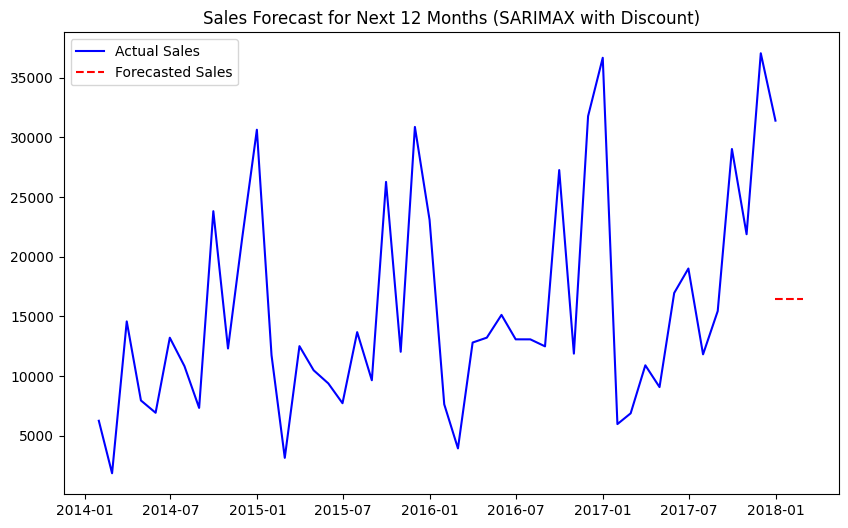

In [260]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(MONTHLY_df.index, MONTHLY_df['Sales'], label='Actual Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red', linestyle='dashed')
plt.legend()
plt.title('Sales Forecast for Next 12 Months (SARIMAX with Discount)')
plt.show()
